In [1]:
#import libraries
import pandas as pd
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
#import dataset
normal = pd.read_csv('ptbdb_normal.csv')
abnormal = pd.read_csv('ptbdb_abnormal.csv')

In [3]:
#print dataset
print("size Normal => ", normal.shape)
print("size Abnormal => ", abnormal.shape)
abs(abnormal).head(5)

size Normal =>  (4045, 188)
size Abnormal =>  (10505, 188)


,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
#Ubah data menjadi domain frekuensi
kelas_normal = normal.iloc[:,187].values
normal_data = normal.drop(normal.columns[187], axis= 1)
normal_fft = fft(normal_data)
normal_fft = abs(normal_fft)

kelas_abnormal = abnormal.iloc[:, 187].values
abnormal_data = abnormal.drop(abnormal.columns[187], axis= 1)
abnormal_fft = fft(abnormal_data)
abnormal_fft = abs(abnormal_fft)

t = pd.DataFrame(abnormal_fft)
t

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,24.199354,3.849496,8.615902,3.079419,1.695783,2.514032,4.794532,3.421330,5.764316,2.417331,...,2.246170,2.417331,5.764316,3.421330,4.794532,2.514032,1.695783,3.079419,8.615902,3.849496
1,52.144393,32.958656,2.351356,12.721755,3.134033,7.218954,1.364942,5.803043,2.384688,4.849889,...,0.354173,4.849889,2.384688,5.803043,1.364942,7.218954,3.134033,12.721755,2.351356,32.958656
2,36.390943,19.447426,6.048813,7.794833,2.607017,2.129976,2.321732,1.141394,3.455549,2.361123,...,3.148934,2.361123,3.455549,1.141394,2.321732,2.129976,2.607017,7.794833,6.048813,19.447426
3,14.881620,12.752691,8.160832,5.660294,5.570299,3.750281,2.081661,4.213527,4.979983,4.024085,...,3.114334,4.024085,4.979983,4.213527,2.081661,3.750281,5.570299,5.660294,8.160832,12.752691
4,23.466815,14.660791,0.848007,4.939518,0.490910,1.522956,2.107525,2.909284,0.418493,1.850288,...,2.105003,1.850288,0.418493,2.909284,2.107525,1.522956,0.490910,4.939518,0.848007,14.660791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10500,26.034323,11.399380,8.772081,0.668600,1.832835,4.601850,1.772192,5.677275,2.146649,2.880900,...,4.501228,2.880900,2.146649,5.677275,1.772192,4.601850,1.832835,0.668600,8.772081,11.399380
10501,39.524194,26.503747,1.764154,10.571267,3.084895,7.833916,6.661796,2.901097,6.620332,1.082388,...,4.112298,1.082388,6.620332,2.901097,6.661796,7.833916,3.084895,10.571267,1.764154,26.503747
10502,26.919851,5.306395,5.306412,8.348151,7.897165,0.676749,7.176984,5.892476,2.194502,3.747204,...,6.532201,3.747204,2.194502,5.892476,7.176984,0.676749,7.897165,8.348151,5.306412,5.306395
10503,34.963166,13.287760,8.893780,1.803000,6.898501,4.630130,4.581836,3.524917,2.825505,4.576781,...,3.299176,4.576781,2.825505,3.524917,4.581836,4.630130,6.898501,1.803000,8.893780,13.287760


94


Text(0.5, 1.0, '1/2 Detak Jantung Abnormal pada Domain Frekuensi')

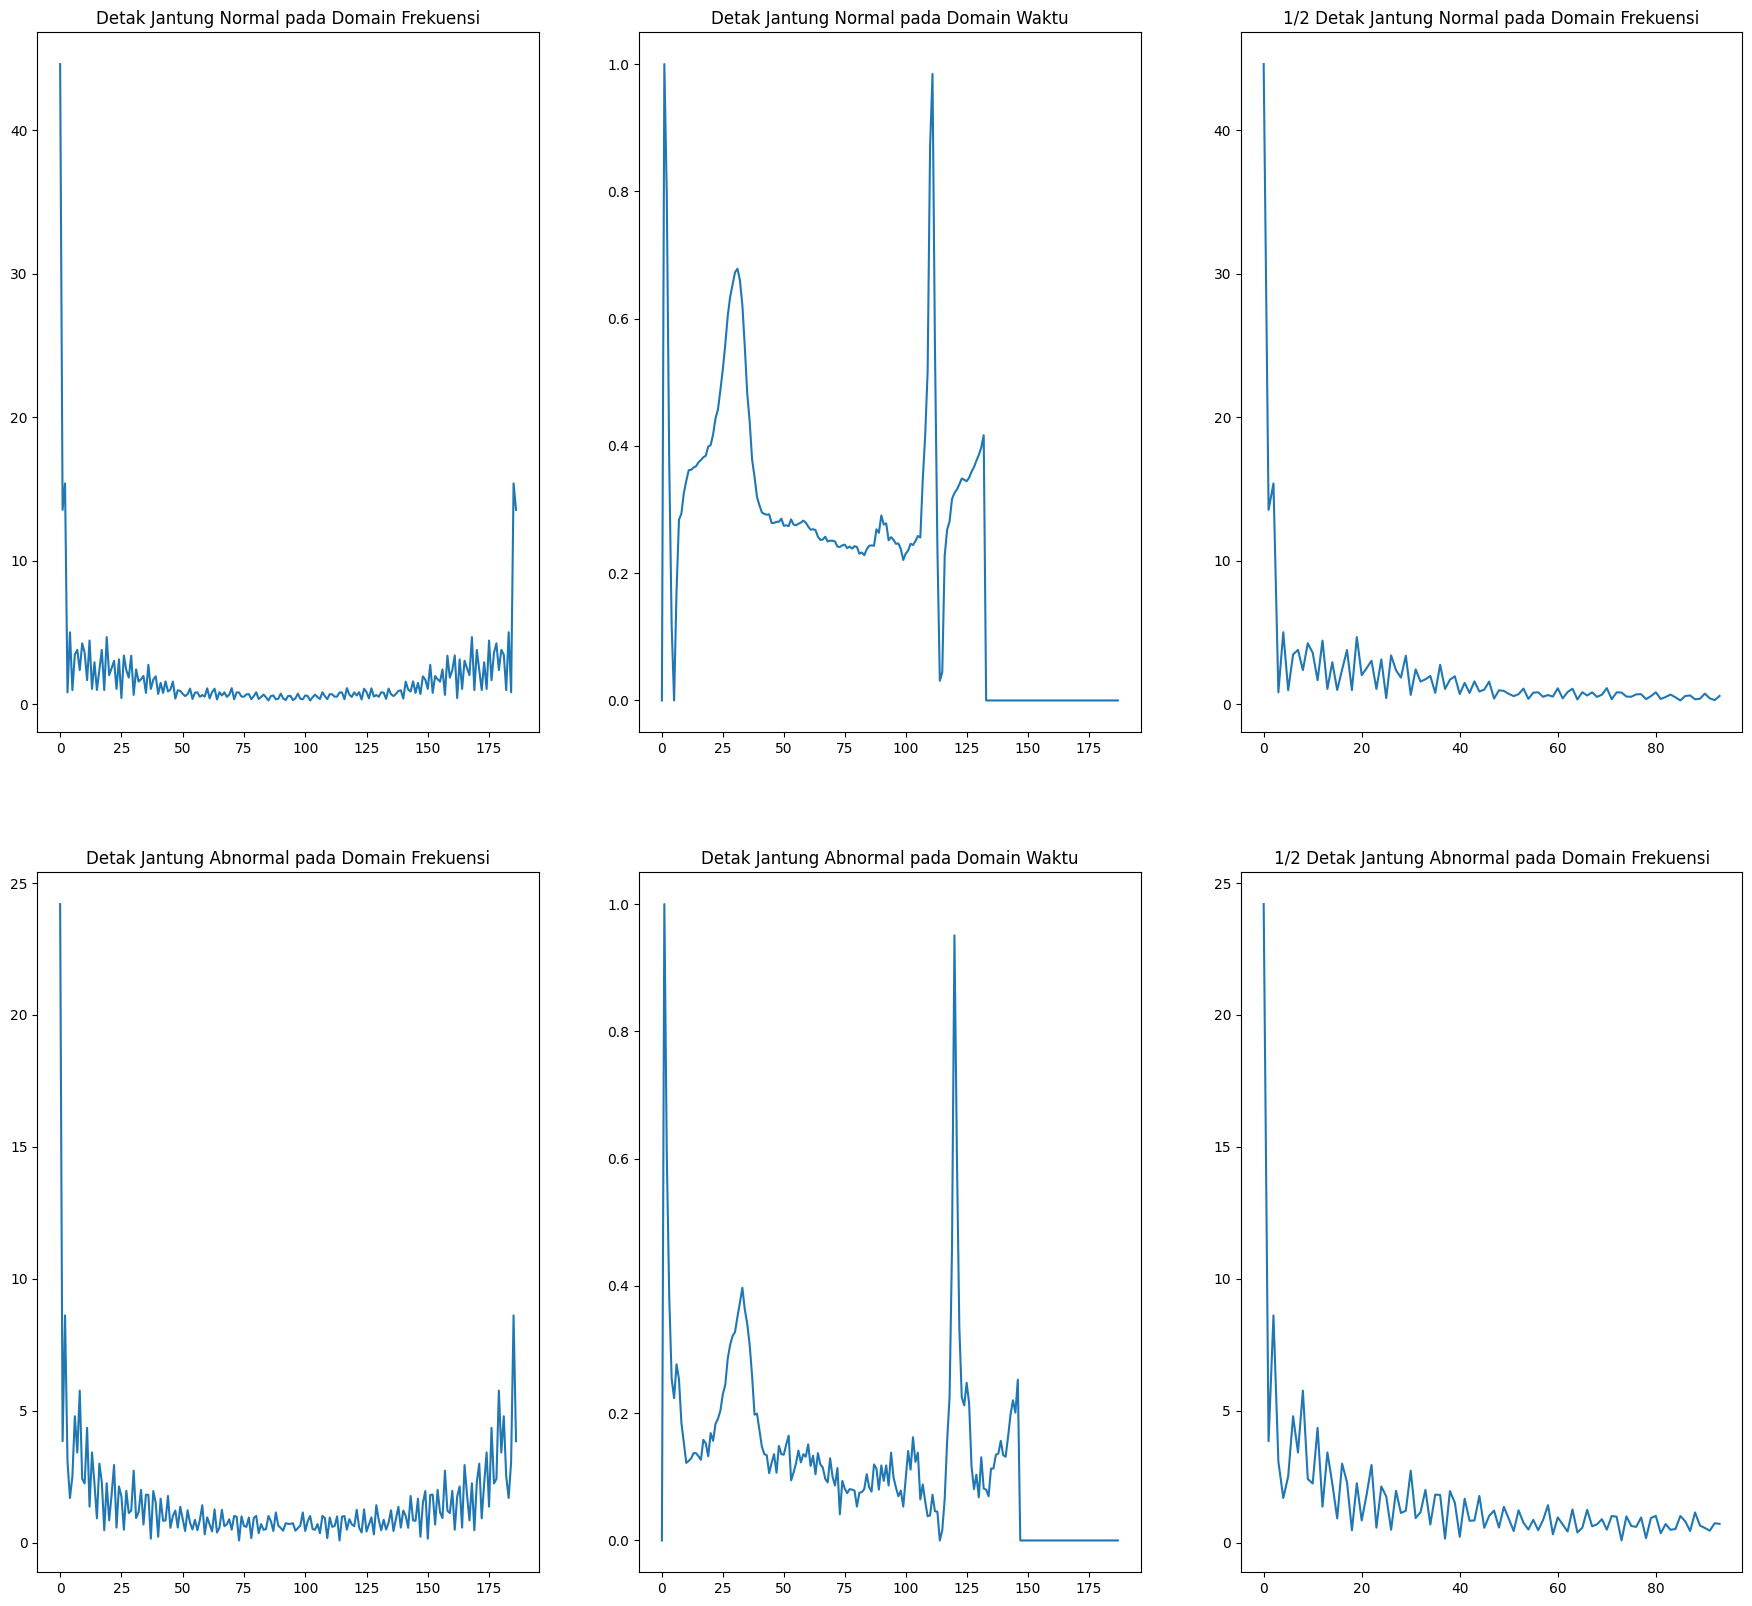

In [5]:
#perbandingan sinyal setelah dan sebelum menggunakan FFT
fig, axis = plt.subplots(2, 3, figsize=(22, 20))
half_len_data = (normal_fft.shape[1]//2) + 1
print(half_len_data)

axis[0,0].plot(range(0, len(normal_fft[0,:])), normal_fft[0,:])
axis[0,0].set_title("Detak Jantung Normal pada Domain Frekuensi")

normal_data = normal_data.reset_index()
axis[0, 1].plot(range(len(normal_data.iloc[0, :])), normal_data.iloc[0, :])
axis[0, 1].set_title("Detak Jantung Normal pada Domain Waktu")

axis[0,2].plot(normal_fft[0,: half_len_data])
axis[0,2].set_title("1/2 Detak Jantung Normal pada Domain Frekuensi")

axis[1,0].plot(range(0, len(abnormal_fft[0,:])), abnormal_fft[0,:])
axis[1,0].set_title("Detak Jantung Abnormal pada Domain Frekuensi")

abnormal_data = abnormal_data.reset_index()
axis[1,1].plot(range(len(abnormal_data.iloc[0, :])), abnormal_data.iloc[0, :])
axis[1,1].set_title("Detak Jantung Abnormal pada Domain Waktu")

axis[1,2].plot(abnormal_fft[0,: half_len_data])
axis[1,2].set_title("1/2 Detak Jantung Abnormal pada Domain Frekuensi")


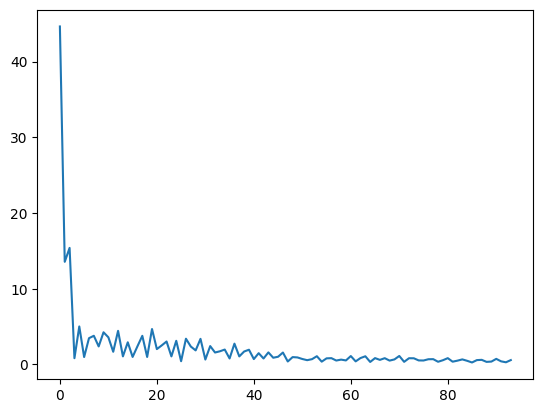

0     44.625850
1     13.554669
2     15.396179
3      0.832166
4      5.020041
        ...    
89     0.385624
90     0.743316
91     0.416449
92     0.291914
93     0.581655
Name: 0, Length: 94, dtype: float64


In [6]:
#Proses data normal dan abnormal
#data normal
frame_normal_fft = pd.DataFrame(data= normal_fft)
frame_normal_fft = frame_normal_fft.drop(frame_normal_fft.columns[half_len_data:187], axis= 1)
frame_normal_fft["class"] = kelas_normal

#data abnormal
frame_abnormal_fft = pd.DataFrame(data= abnormal_fft)
frame_abnormal_fft = frame_abnormal_fft.drop(frame_abnormal_fft.columns[half_len_data:187], axis=1)
frame_abnormal_fft["class"] = kelas_abnormal

#meyatukan dua data
total_each_data = 4000
merged_data = pd.concat([frame_normal_fft.iloc[0: total_each_data, :], frame_abnormal_fft.iloc[0: total_each_data, :]])

plt.plot(merged_data.iloc[0,: 94])
plt.show()

print(merged_data.iloc[0,: 94])

In [7]:
#Membuat Fungsi Normalisasi
def normalisasi(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data) + 0.00000001)

In [8]:
#Masukkan Fungsi Normalisasi
target = merged_data["class"]
no_label_data = merged_data.iloc[:, :94]
data_ternomalisasi = normalisasi(no_label_data.T)

data_ternomalisasi = pd.DataFrame(data_ternomalisasi.T)
data_ternomalisasi["class"] = target

data_ternomalisasi.iloc[:, :94]

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,0.383728,0.116540,0.132375,0.007136,0.043148,0.008443,0.029849,0.032581,0.020490,0.036543,...,0.004165,0.002274,0.004966,0.005267,0.002958,0.003296,0.006372,0.003561,0.002490,0.004981
1,0.262944,0.019440,0.060941,0.032763,0.022026,0.031397,0.029948,0.040348,0.034032,0.033465,...,0.002532,0.001972,0.003239,0.003666,0.004076,0.004476,0.004350,0.003559,0.002752,0.002016
2,0.118211,0.017258,0.048882,0.018502,0.033060,0.018033,0.033388,0.044256,0.011824,0.023802,...,0.005826,0.005779,0.004192,0.004755,0.005116,0.005219,0.003767,0.004954,0.005449,0.004794
3,0.163925,0.025709,0.052432,0.027709,0.035367,0.025463,0.032745,0.051985,0.020510,0.021007,...,0.005277,0.003078,0.001071,0.003796,0.003732,0.002780,0.002203,0.003083,0.003363,0.002296
4,0.184829,0.044565,0.076417,0.006952,0.013419,0.010078,0.043676,0.020344,0.050582,0.018204,...,0.003861,0.005100,0.002224,0.006428,0.003682,0.003752,0.004478,0.004358,0.001995,0.005160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.439734,0.312372,0.056408,0.103055,0.065325,0.052015,0.079242,0.009701,0.047938,0.026534,...,0.000605,0.006550,0.002787,0.005829,0.006179,0.002328,0.006821,0.001575,0.005602,0.003848
3996,0.155619,0.064818,0.049429,0.010731,0.054468,0.008474,0.046573,0.002839,0.052234,0.007472,...,0.004555,0.002629,0.004704,0.003894,0.003490,0.002979,0.003906,0.003692,0.002588,0.003719
3997,0.416589,0.140902,0.111064,0.059191,0.087890,0.065574,0.027351,0.019968,0.021328,0.049070,...,0.007132,0.002763,0.002933,0.006377,0.006087,0.002508,0.004432,0.005485,0.002920,0.006570
3998,0.445722,0.317161,0.058112,0.102816,0.066210,0.052090,0.078762,0.008362,0.049781,0.027543,...,0.001606,0.007602,0.002565,0.006637,0.006447,0.002941,0.007867,0.001396,0.006941,0.004624


<bound method Series.unique of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3995    1.0
3996    1.0
3997    1.0
3998    1.0
3999    1.0
Name: class, Length: 8000, dtype: float64>

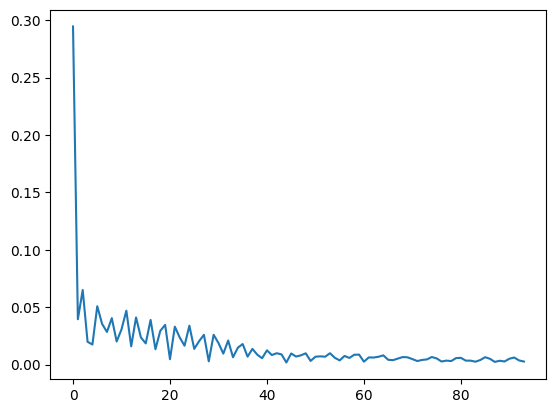

In [9]:
plt.plot(data_ternomalisasi.iloc[45, :94])
data_ternomalisasi["class"].unique

In [10]:
#Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_ternomalisasi.iloc[:, :94], data_ternomalisasi["class"], test_size= 0.2, random_state=42)

TRAINING DATA

In [11]:
#Training Data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, BatchNormalization, Concatenate

2023-11-06 22:53:18.249654: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 22:53:18.282214: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 22:53:18.282257: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 22:53:18.282275: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 22:53:18.288871: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 22:53:18.289670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [12]:
#Definisikan model/struktur ANN kita
def struk_mod(input_shape):
    model = keras.models.Sequential()
    model.add(Dense(units=input_shape, activation="relu"))
    model.add(Dense(units=500, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))

    return model

In [13]:
input_shape = (data_ternomalisasi.iloc[:, :94].shape[1], 1)
def residualModel(input_shape):
    model = keras.models.Sequential()

    input_data = tf.keras.layers.Input(shape=(input_shape))

    conv1_1 = Conv1D(64, 7, padding="same", input_shape= input_shape) (input_data)
    conv1_1 = BatchNormalization() (conv1_1)
    conv1_1 = tf.keras.layers.ReLU() (conv1_1)

    conv1_2 = Conv1D(64, 7, padding="same") (conv1_1)
    conv1_2 = BatchNormalization() (conv1_2)
    conv1_2 = tf.keras.layers.ReLU() (conv1_2)
    
    conv1_3 = Conv1D(64, 7, padding="same") (conv1_2)
    conv1_3 = BatchNormalization() (conv1_3)
    conv1_3 = tf.keras.layers.ReLU() (conv1_3)

    conc1 = Concatenate() ([conv1_1, conv1_3])
    max_1 = MaxPool1D(5, padding="same") (conc1)
    
    conv1_4 = Conv1D(128, 7, padding="same") (max_1)
    conv1_4 = BatchNormalization() (conv1_4)
    conv1_4 = tf.keras.layers.ReLU() (conv1_4)

    conv1_5 = Conv1D(128, 7, padding="same", input_shape= input_shape) (conv1_4)
    conv1_5 = BatchNormalization() (conv1_5)
    conv1_5 = tf.keras.layers.ReLU() (conv1_5)

    conv1_6 = Conv1D(128, 7, padding="same", input_shape= input_shape) (conv1_5)
    conv1_6 = BatchNormalization() (conv1_6)
    conv1_6 = tf.keras.layers.ReLU() (conv1_6)

    conc2 = Concatenate() ([conv1_4, conv1_6])
    max_2 = MaxPool1D(5, padding="same") (conc2)

    conv1_7 = Conv1D(256, 7, padding="same") (max_2)
    conv1_7 = BatchNormalization() (conv1_7)
    conv1_7 = tf.keras.layers.ReLU() (conv1_7)

    conv1_8 = Conv1D(256, 7, padding="same") (conv1_7)
    conv1_8 = BatchNormalization() (conv1_8)
    conv1_8 = tf.keras.layers.ReLU() (conv1_8)

    conv1_9 = Conv1D(256, 7, padding="same") (conv1_8)
    conv1_9 = BatchNormalization() (conv1_9)
    conv1_9 = tf.keras.layers.ReLU() (conv1_9)

    conc3 = Concatenate() ([conv1_7, conv1_9])
    max_3 = MaxPool1D(5, padding="same") (conc3)

    datar = Flatten() (max_3)
    
    dense1 = Dense(512, activation="relu") (datar)
    drop1 = Dropout(0.5) (dense1)

    dense2 = Dense(256, activation="relu") (drop1)
    drop2 = Dropout(0.5) (dense2)

    dense3 = Dense(128, activation="relu") (drop2)
    dense4 = Dense(64, activation="relu") (dense3)
    dense5 = Dense(32, activation="relu") (dense4)
    dense6 = Dense(1, activation="sigmoid") (dense5)

    model = Model(inputs= input_data, outputs= dense6)
    return model

In [14]:
model = struk_mod(input_shape=94)

2023-11-06 22:53:19.919606: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-06 22:53:19.948729: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

model.compile(loss="binary_crossentropy", optimizer= opt, metrics=["accuracy"])

In [16]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=50, min_delta=0.001, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model.h5", save_best_only=True)

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 1000, batch_size=32, shuffle=True, callbacks=[early_stop_cb, checkpoint_cb])

Epoch 1/1000
200/200 [==============================] - 1s 4ms/step - loss: 0.5363 - accuracy: 0.7063 - val_loss: 0.5029 - val_accuracy: 0.7487
Epoch 2/1000
 64/200 [========>.....................] - ETA: 0s - loss: 0.5080 - accuracy: 0.7422

/home/mayuka/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/200 [==============================] - 1s 3ms/step - loss: 0.4946 - accuracy: 0.7408 - val_loss: 0.4571 - val_accuracy: 0.7731
Epoch 3/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4612 - accuracy: 0.7658 - val_loss: 0.4353 - val_accuracy: 0.7812
Epoch 4/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4444 - accuracy: 0.7769 - val_loss: 0.4405 - val_accuracy: 0.7731
Epoch 5/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4352 - accuracy: 0.7805 - val_loss: 0.4324 - val_accuracy: 0.7788
Epoch 6/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4062 - accuracy: 0.8027 - val_loss: 0.4396 - val_accuracy: 0.7756
Epoch 7/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4238 - accuracy: 0.7981 - val_loss: 0.3970 - val_accuracy: 0.8175
Epoch 8/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.8012 - val_loss: 0.3954 - val_accuracy: 0.8206
Epoch

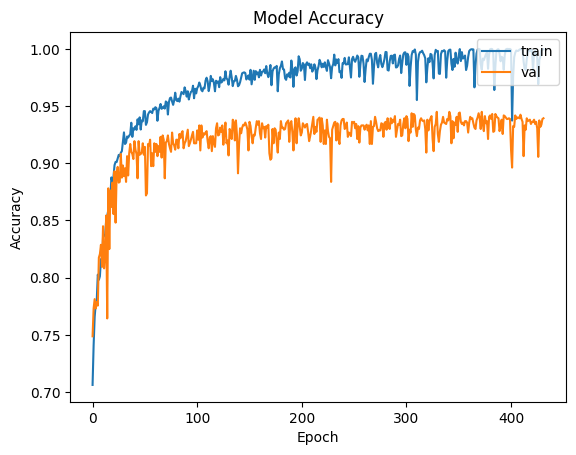

In [18]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc="upper right")
plt.show()

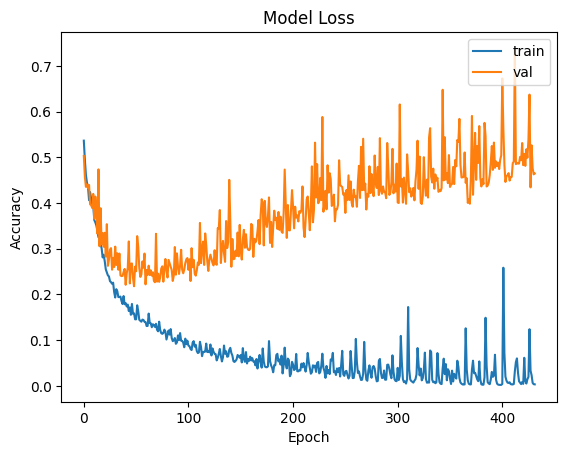

In [19]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc="upper right")
plt.show()

TEST DATA

In [20]:
y_yard = model.predict(X_test)
y_yard_pred = pd.DataFrame(y_yard)
y_yard_train = model.predict(X_train)
y_yard_train_result = pd.DataFrame(y_yard_train)

#Masukkan klasifikasi
y_yard_pred = y_yard_pred[0].transform(lambda x: "normal" if x < 0.5 else "abnormal")
y_yard_train_result = y_yard_train_result[0].transform(lambda x: "normal" if x < 0.5 else "abnormal")
print(y_yard_pred)


200/200 [==============================] - 0s 2ms/step
0         normal
1         normal
2         normal
3         normal
4       abnormal
          ...   
1595      normal
1596    abnormal
1597      normal
1598    abnormal
1599    abnormal
Name: 0, Length: 1600, dtype: object


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

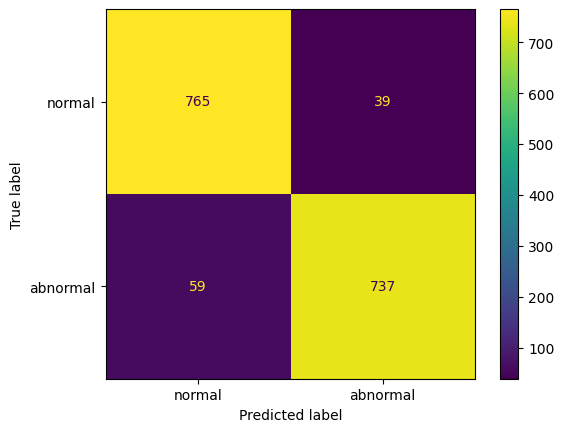

In [22]:
hasil_ptb = {0. : "Normal",
             1. : "Abnormal"}

y_true = y_test.transform(lambda x: "normal" if x < 0.5 else "abnormal")
y_train_true = y_train.transform(lambda x: "normal" if x < 0.5 else "abnormal")

matrix = confusion_matrix(y_true=y_true, y_pred=y_yard_pred, labels=["normal", "abnormal"])
matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=["normal", "abnormal"])
matrix_plot.plot()

In [23]:
tn, fp, fn, tp = matrix.ravel()
print("True Negative : ", tn)
print("False Positive : ", fp)
print("False Negative : ", fn)
print("True Positive : ", tp)

True Negative :  765
False Positive :  39
False Negative :  59
True Positive :  737


In [24]:
print("====== DATA TEST ======")
print(classification_report(y_true, y_yard_pred, target_names=[hasil_ptb[i] for i in hasil_ptb]))
print("====== DATA TRAIN ======")
print(classification_report(y_train_true, y_yard_train_result, target_names=[hasil_ptb[i] for i in hasil_ptb]))

====== DATA TEST ======
              precision    recall  f1-score   support

      Normal       0.95      0.93      0.94       796
    Abnormal       0.93      0.95      0.94       804

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

====== DATA TRAIN ======
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      3204
    Abnormal       1.00      1.00      1.00      3196

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400

